# EN5204 2019: Assignment 03 on Object Counting on a Conveyor Belt -198374U

## Connected Componet Analysis

In this part, we will generate an indexed image representing connected coponets in `template.png` and and `belt.png` images. Notice that, as there are three hexagonal nuts in `belt.png` image, there will be four connected components (backgound will be assigned the label 0). The hexagonal nut in `template.png` is the template.

1. Open the `template.png` and and `belt.png` and display. This is done for you.


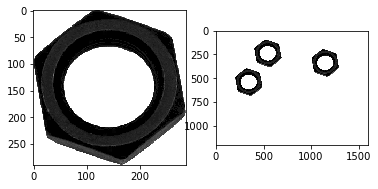

In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle
import math

template_im = cv.imread('template.png', cv.IMREAD_GRAYSCALE)
belt_im =  cv.imread('belt.png', cv.IMREAD_GRAYSCALE)

fig, ax = plt. subplots(1,2)
ax[0].imshow(template_im, cmap='gray')
ax[1].imshow(belt_im, cmap='gray')
plt.show()

2. Apply Otsu's thresholding to obtain the binarized image. Do this for both the template and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.

Answer for 1.2


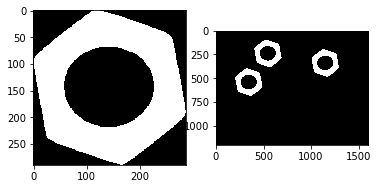

In [2]:
print("Answer for 1.2")
ret_template,Otsus_thre_template_im = cv.threshold(template_im,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
ret_belt,Otsus_thre_belt_im = cv.threshold(belt_im,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)

fig, ax = plt. subplots(1,2)
ax[0].imshow(Otsus_thre_template_im, cmap='gray')
ax[1].imshow(Otsus_thre_belt_im, cmap='gray')
plt.show()

3. Carry out morphological closing to remove small holes inside the foreground. Use a $3 \times 3$ kernel. See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.

Answer for 1.3


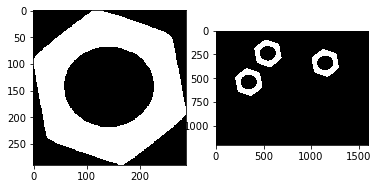

In [3]:
print("Answer for 1.3")
kernel = np.ones((3,3),np.uint8)
mono_closing_template_im = cv.morphologyEx(Otsus_thre_template_im, cv.MORPH_CLOSE, kernel)
mono_closing_belt_im = cv.morphologyEx(Otsus_thre_belt_im, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,2)
ax[0].imshow(mono_closing_template_im, cmap='gray')
ax[1].imshow(mono_closing_belt_im, cmap='gray')
plt.show()

4. Connected components analysis: apply the `connectedComponentsWithStats` function (see https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) and display the outputs as colormapped images. Answer the following questions

- How many connected compoonets are detected in each image?
- What are the statistics? Interpret these statistics.
- What are the centroids?

For the template, you should get the object pixel area as `40650` and the centroid as `(142.8 143.8)`.

Answer for 1.4
i
No. of connected components in template image (im1) =1
No. of connected components in belt image (im2) =3


ii
Statictics of template image (im1) [leftmost x coordinate, topmost y coordinate, horizontal size, vertical size, total area (in pixels)]
[[    0     0   286   290 40650]]


Statictics of belt image (im2) [leftmost x coordinate, topmost y coordinate, horizontal size, vertical size, total area (in pixels)]
[[  400   100   286   290 40613]
 [ 1000   200   286   290 40613]
 [  200   400   286   290 40613]]


iii
Centroids of template image (im1)
[[142.82489545 143.780369  ]]


Centroids of belt image (im2)
[[ 542.82567158  243.78479797]
 [1142.82567158  343.78479797]
 [ 342.82567158  543.78479797]]




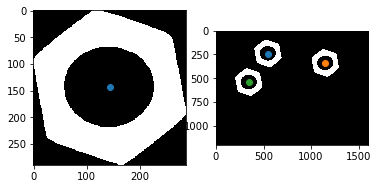

In [4]:
print("Answer for 1.4")
template_im_count, template_im_labels, template_im_stats, template_im_centroids = cv.connectedComponentsWithStats(mono_closing_template_im, 4, cv.CV_32S)
belt_im_count, belt_im_labels, belt_im_stats, belt_im_centroids = cv.connectedComponentsWithStats(mono_closing_belt_im, 4, cv.CV_32S)
print("i")
print("No. of connected components in template image (im1) =" + str(template_im_count-1))
print("No. of connected components in belt image (im2) =" + str(belt_im_count-1))

#Stats
print("\n")
print("ii")
print("Statictics of template image (im1) [leftmost x coordinate, topmost y coordinate, horizontal size, vertical size, total area (in pixels)]")
print(template_im_stats[1:])
print("\n")
print("Statictics of belt image (im2) [leftmost x coordinate, topmost y coordinate, horizontal size, vertical size, total area (in pixels)]")
print(belt_im_stats[1:])


print("\n")
print("iii")
print("Centroids of template image (im1)")
print(template_im_centroids[1:])
print("\n")
print("Centroids of belt image (im2)")
print(belt_im_centroids[1:])
print("\n")



fig, ax = plt. subplots(1,2)
ax[0].imshow(mono_closing_template_im, cmap='gray')
ax[1].imshow(mono_closing_belt_im, cmap='gray')

for centroid in template_im_centroids[1:]:
  ax[0].scatter(centroid[0], centroid[1])
for centroid in belt_im_centroids[1:]:
  ax[1].scatter(centroid[0], centroid[1])

plt.show()


5. Contour analysis: Use `findContours` function  to retrieve the  *extreme outer* contours. 
(see https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html for help and https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0 for information.

Display these countours. You should see somehting like the following:



Answer for 1.5


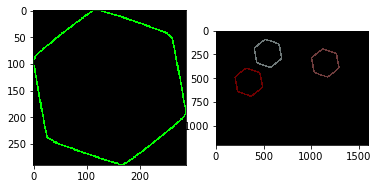

In [5]:
print("Answer for 1.5")


x_template, contours_template, hierarchy_template = cv.findContours(mono_closing_template_im, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
x_belt, contours_belt, hierarchy_belt = cv.findContours(mono_closing_belt_im, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

template_im_new = np.zeros((mono_closing_template_im.shape[0],mono_closing_template_im.shape[1]),np.uint8)
template_im_new = cv.cvtColor(template_im_new, cv.COLOR_GRAY2RGB)

belt_im_new = np.zeros((mono_closing_belt_im.shape[0],mono_closing_belt_im.shape[1]),np.uint8)
belt_im_new = cv.cvtColor(belt_im_new, cv.COLOR_GRAY2RGB)

for i in range (0, len(contours_template)):
  if (hierarchy_template[0][i][3]==-1):    
    cv.drawContours(template_im_new, contours_template, i, (0,255,0), 2)

for i in range (0, len(contours_belt)):
  if (hierarchy_belt[0][i][3]==-1):
    cv.drawContours(belt_im_new, contours_belt, i, ((110),(i*30),(i*30)), 15)

fig, ax = plt. subplots(1,2)
ax[0].imshow(template_im_new)
ax[1].imshow(belt_im_new)
plt.show()

## Detecting Objects on a Synthetic Conveyor

In this section, we will use the synthetic `conveyor_with_rotation.mp4` sequence to count hexagonal nuts. 

1. Open the sequence and play it using the code below.

In [6]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor_with_rotation.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 770), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


2. Count the number of matchign hexagonal nuts in `belt.png`.

You can use `matchCountours` function as shown in https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html to match contuous in each frame with that in th template. 

In [7]:
print("Answer for 2.2")

template_im_con, template_im_hier = cv.findContours(mono_closing_template_im, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)[1:]
belt_im_con, belt_im_hire = cv.findContours(mono_closing_belt_im, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)[1:]

Hex_Count = 0
for i in range (0, len(belt_im_con)):
    ret = cv.matchShapes(template_im_con[0], belt_im_con[i], 1, 0.0)
    matching = (ret < 0.0002)
    if matching:
        Hex_Count += 1
print("\n")
print("Matching hexahonal nuts =" + str(Hex_Count))

Answer for 2.2


Matching hexahonal nuts =3


3. Count the nummber of objects that were converyed along the converyor belt as seen in this video. 

It woudl be good to experiment first with the `conveyor_two_frame.mp4`, which is a two-frame video sequence. In order to disregard partially apearing hexagonal nuts, consider comparing the contour area in additon to using the `matchCountours` function. You shoudl generate a vidos as `conveyor_result.mp4`.


In [8]:
def DistanceToCenter(c1, c2):
    return math.sqrt(pow((c1[0] - c2[0]), 2) + pow((c1[1] - c2[1]), 2))

cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)

cap = cv.VideoCapture('conveyor_with_rotation.mp4')
vedio_out = cv.VideoWriter('result_198374U.mp4', -1, 20.0, (1920, 1080))
f = 0
frame = []



Old_Contours = []
colors = [(165, 42, 42), (124, 255, 47), (255, 165, 0), (75, 0, 130), (238, 130, 238)]
j = 1

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    f += 1
    
    frame_g = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    ret_f, threshold_f = cv.threshold(frame_g, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
    kernel = np.ones((3, 3), np.uint8)
    frame_c = cv.morphologyEx(threshold_f, cv.MORPH_CLOSE, kernel)
    
    num_labels_frame, labels_frame, stats_frame, centroids_frame = cv.connectedComponentsWithStats(frame_c, 4, cv.CV_32S)
    
    x, contours, hierarchy = cv.findContours(frame_c, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    im_new = np.zeros((frame_c.shape[0],frame_c.shape[1]),np.uint8)
    im_new = cv.cvtColor(im_new, cv.COLOR_GRAY2RGB)

    Count = 0
    for i in range (0, len(contours)):
      if (hierarchy[0][i][3] == -1):
        cv.drawContours(im_new, contours, i, colors[Count], 2)
        Count += 1
            
    Contours_N = []
    for i in range (1, num_labels_frame):
        Contours_N.append([-1, centroids_frame[i], stats_frame[i][4]])
    for x in range(0, len(Contours_N)):
        for y in range(0, len(Old_Contours)):
            if (DistanceToCenter(Contours_N[x][1], Old_Contours[y][1]) < 200):
                Contours_N[x][0] = Old_Contours[y][0]
    
    for x in range(0, len(Contours_N)):
        if (Contours_N[x][0] == -1):
            Contours_N[x][0] = j
            j += 1
            
    Old_Contours.clear()
    for item in Contours_N:
        Old_Contours.append(item)

    display_O = 1
    for item in Contours_N:
        if (item[2] > 35000):
            cv.putText(im_new, str(item[0]) , tuple([int(x) for x in item[1]]), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
            cv.putText(im_new, 'Object ' + str(item[0]) + ": " + str(item[1]) + ", " + str(item[2]) , (100, 700 + 50*display_O), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
            display_O += 1
        
    text = 'Frame:' + str(f)
    cv.putText(im_new, text , (100, 700), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', im_new)
    vedio_out.write(im_new)
    
    if cv.waitKey(1) == ord('q'):
        break


cap.release()
vedio_out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
